Download the [abalone](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv) dataset.

We would like to test whether the whole weight of the snail is on average different between male and female snails.

* Does this data meet the assumptions to answer such a question statistically?

* What are the formal hypotheses?

* Conduct the hypothesis test. What is the p-value? What can you say given the p-value and significance level?


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [ ]:
abalone_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv')

In [ ]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
abalone_df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
male_snails = abalone_df[(abalone_df['Sex']=='M')]
female_snails = abalone_df[(abalone_df['Sex']=='F')]

In [ ]:
male_snails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1528 non-null   object 
 1   Length                 1528 non-null   float64
 2   Diameter               1528 non-null   float64
 3   Height                 1528 non-null   float64
 4   Whole_weight           1528 non-null   float64
 5   Shucked_weight         1528 non-null   float64
 6   Viscera_weight         1528 non-null   float64
 7   Shell_weight           1528 non-null   float64
 8   Class_number_of_rings  1528 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 119.4+ KB


In [ ]:
female_snails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    1307 non-null   object 
 1   Length                 1307 non-null   float64
 2   Diameter               1307 non-null   float64
 3   Height                 1307 non-null   float64
 4   Whole_weight           1307 non-null   float64
 5   Shucked_weight         1307 non-null   float64
 6   Viscera_weight         1307 non-null   float64
 7   Shell_weight           1307 non-null   float64
 8   Class_number_of_rings  1307 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 102.1+ KB


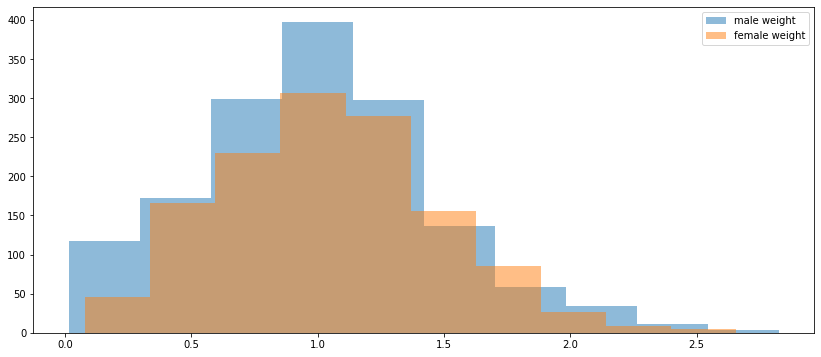

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(male_snails['Whole_weight'], alpha= .5, label='male weight')
plt.hist(female_snails['Whole_weight'], alpha = .5, label='female weight')
plt.legend()
plt.show()

In [ ]:
stats.describe(male_snails['Whole_weight'])

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)

In [ ]:
stats.describe(female_snails['Whole_weight'])

DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)

In [ ]:
print('Shapiro-Wilk:')
print(stats.shapiro(male_snails['Whole_weight']))
print(stats.shapiro(female_snails['Whole_weight']))
print('Jarque-Bera:')
print(stats.jarque_bera(male_snails['Whole_weight']))
print(stats.jarque_bera(female_snails['Whole_weight']))
print('D\'Agostino-Pearson:')
print(stats.normaltest(male_snails['Whole_weight']))
print(stats.normaltest(female_snails['Whole_weight']))

Shapiro-Wilk:
(0.9863144755363464, 7.720586669979213e-11)
(0.9892150163650513, 3.156421257699549e-08)
Jarque-Bera:
(49.79525698266909, 1.538502658604557e-11)
(29.701633009573772, 3.5511771712126716e-07)
D'Agostino-Pearson:
NormaltestResult(statistic=45.57768379606874, pvalue=1.2674525652361236e-10)
NormaltestResult(statistic=28.32498241676317, pvalue=7.06819004778211e-07)


**Does this data meet the assumptions to answer such a question statistically?**

Yes, it does. The variances of both male and female weight distributions appear to be similiar and both appear to follow a normal distribution with low values for skewness and kurtosis and very small p-values for the statistics tests above. 



**What are the formal hypotheses?**

Null Hypothesis: 

On average, there is no difference in weight between male and female snails.

Alternative Hypothesis: 

On average, does the population of male snails have a different weight (higher or lower) than the population of female snails, given the samples that have been collected?

In [ ]:
stats.ttest_ind(male_snails['Whole_weight'], female_snails['Whole_weight'])

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(male_snails['Whole_weight'], female_snails['Whole_weight'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.021891169188311944 and 0.08825425196320211.'

**Conduct the hypothesis test. What is the p-value? What can you say given the p-value and significance level?**

The p-value is about 0.001 and is less than 0.05, therefore we can reject the null hypothesis. 

So we can say there is a 0.1% chance of observing a difference as large or larger as was observed due to random error. 

We can say with 95% confidence that male snails have a weight on average that is between 0.022 and 0.088 (grams?) lower than female snails. 


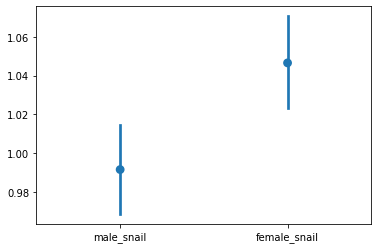

In [ ]:
g = sns.pointplot(data=[male_snails['Whole_weight'],
                        female_snails['Whole_weight']], join=False)
                        
g.set(xticklabels = ['male_snail', 'female_snail'])

plt.show()